# Algoritmo de clasificación de imágenes

In [96]:
# Por tema credenciales, es mas facil hacer la descarga desde microsoft:
# https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip


# 1. El data set es muy grande (mas de 700 MG)
# 2. Dentro de las imagenes hay errores, y esas imagenes no las vamos a poder procesar.
# 3. Estructura de carpetas: El dataset original tiene 2 carpetas, una para cat y otra para dog.
#    Debemos convertir el dataset a los clasicos dataset de aprendisaje, validacion y prueba.

# Entonces:

    # * Bajar el dataset a colab
    # * Descomprimirlo
    # * Crear carpetas para el dataset de entrenamiento, validacion y prueba
    # * Dentro de cada carpeta, crear una carpeta cat y otra dog
    # * Debemos extraer las imagenes de manera aleatoria
    # * Montarlas en las carpetas corerspondientes
    # * Generar que cada carpeta contenga la etiqueta (el resultado de la clasificacion: cat | dog) 
    #   y las imagenes

# Todo esto lo haremos utilizando dos herramientas: Python y Bash

![alt text](image.png)

In [97]:
# Importar paquetes
import os 

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

import plotly.graph_objects as go
from PIL import Image
import tensorflow as tf

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay
)

def remove_file(path):                              # Funcion adhoc para borrar archivos con fallas.
  if os.path.exists(path):
    try:
      os.remove(path)
    except PermissionError:                         # En caso de error del sistema
      print(f'Permission denied to delete{path}')
    except OSError:                                 # En caso de error del sistema
      print(f'OS Error in {path}')

#  Esta funcion esta procesando los archivos por detras utilizando bash.

In [98]:
!rm -rf ./data/datasets/cats_and_dogs_extracted

In [99]:
# ◯ Paso 1: Importar librerías necesarias
import os
import tensorflow as tf

# ◯ Paso 2: Definir ruta local para descargar y extraer los datos
DATA_DIR = "./data"
os.makedirs(DATA_DIR, exist_ok=True)

# ◯ Paso 3: Definir la URL del dataset
URL = 'https://download.microsoft.com/download/3/e/1/3e1c3f21-ecdb-4869-8368-6deba77b919f/kagglecatsanddogs_5340.zip'

# ◯ Paso 4: Descargar y extraer el archivo zip
path_to_zip = tf.keras.utils.get_file(
    fname='cats_and_dogs.zip',
    origin=URL,
    extract=True,
    cache_dir=DATA_DIR
)

print(f'Dataset descargado en: {path_to_zip}')


Dataset descargado en: ./data/datasets/cats_and_dogs_extracted


In [100]:
!ls ./data/datasets/cats_and_dogs_extracted/PetImages/Dog

0.jpg	   11604.jpg  1963.jpg	3570.jpg  5178.jpg  6786.jpg  8393.jpg
1.jpg	   11605.jpg  1964.jpg	3571.jpg  5179.jpg  6787.jpg  8394.jpg
10.jpg	   11606.jpg  1965.jpg	3572.jpg  518.jpg   6788.jpg  8395.jpg
100.jpg    11607.jpg  1966.jpg	3573.jpg  5180.jpg  6789.jpg  8396.jpg
1000.jpg   11608.jpg  1967.jpg	3574.jpg  5181.jpg  679.jpg   8397.jpg
10000.jpg  11609.jpg  1968.jpg	3575.jpg  5182.jpg  6790.jpg  8398.jpg
10001.jpg  1161.jpg   1969.jpg	3576.jpg  5183.jpg  6791.jpg  8399.jpg
10002.jpg  11610.jpg  197.jpg	3577.jpg  5184.jpg  6792.jpg  84.jpg
10003.jpg  11611.jpg  1970.jpg	3578.jpg  5185.jpg  6793.jpg  840.jpg
10004.jpg  11612.jpg  1971.jpg	3579.jpg  5186.jpg  6794.jpg  8400.jpg
10005.jpg  11613.jpg  1972.jpg	358.jpg   5187.jpg  6795.jpg  8401.jpg
10006.jpg  11614.jpg  1973.jpg	3580.jpg  5188.jpg  6796.jpg  8402.jpg
10007.jpg  11615.jpg  1974.jpg	3581.jpg  5189.jpg  6797.jpg  8403.jpg
10008.jpg  11616.jpg  1975.jpg	3582.jpg  519.jpg   6798.jpg  8404.jpg
10009.jpg  11617.jpg  1976.jp

In [101]:
# ◯ Borrado de Archivos con errores y thumbs.db
#    -----------------------------------------------------------------------------------

remove_file('./data/datasets/cats_and_dogs_extracted/PetImages/Dog/11686.jpg')
remove_file('./data/datasets/cats_and_dogs_extracted/PetImages/Dog/11702.jpg')
remove_file('./data/datasets/cats_and_dogs_extracted/PetImages/Dog/Thumbs.db')
remove_file('./data/datasets/cats_and_dogs_extracted/PetImages/Cat/835.jpg')
remove_file('./data/datasets/cats_and_dogs_extracted/PetImages/Cat/666.jpg')
remove_file('./data/datasets/cats_and_dogs_extracted/PetImages/Cat/Thumbs.db')

In [102]:
!ls ./data/datasets/cats_and_dogs_extracted/PetImages/Cat

0.jpg	   11604.jpg  1963.jpg	3570.jpg  5178.jpg  6787.jpg  8395.jpg
1.jpg	   11605.jpg  1964.jpg	3571.jpg  5179.jpg  6788.jpg  8396.jpg
10.jpg	   11606.jpg  1965.jpg	3572.jpg  518.jpg   6789.jpg  8397.jpg
100.jpg    11607.jpg  1966.jpg	3573.jpg  5180.jpg  679.jpg   8398.jpg
1000.jpg   11608.jpg  1967.jpg	3574.jpg  5181.jpg  6790.jpg  8399.jpg
10000.jpg  11609.jpg  1968.jpg	3575.jpg  5182.jpg  6791.jpg  84.jpg
10001.jpg  1161.jpg   1969.jpg	3576.jpg  5183.jpg  6792.jpg  840.jpg
10002.jpg  11610.jpg  197.jpg	3577.jpg  5184.jpg  6793.jpg  8400.jpg
10003.jpg  11611.jpg  1970.jpg	3578.jpg  5185.jpg  6794.jpg  8401.jpg
10004.jpg  11612.jpg  1971.jpg	3579.jpg  5186.jpg  6795.jpg  8402.jpg
10005.jpg  11613.jpg  1972.jpg	358.jpg   5187.jpg  6796.jpg  8403.jpg
10006.jpg  11614.jpg  1973.jpg	3580.jpg  5188.jpg  6797.jpg  8404.jpg
10007.jpg  11615.jpg  1974.jpg	3581.jpg  5189.jpg  6798.jpg  8405.jpg
10008.jpg  11616.jpg  1975.jpg	3582.jpg  519.jpg   6799.jpg  8406.jpg
10009.jpg  11617.jpg  1976.jp

In [103]:
# ◯ Definimos las Rutas Originales de las imagenes
#    -----------------------------------------------------------------------------------

original_cat_dir = './data/datasets/cats_and_dogs_extracted/PetImages/Cat'
original_dog_dir = './data/datasets/cats_and_dogs_extracted/PetImages/Dog'

# ◯ Crearemos las carpetas train, val y test
#    -----------------------------------------------------------------------------------

os.makedirs('./data/datasets/cats_and_dogs_extracted/train', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs_extracted/val', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs_extracted/test', exist_ok=True)


# ◯ Definimos las carpetas Cat y Dog dentro de cada carpeta de Train, Val y Test
#    -----------------------------------------------------------------------------------

os.makedirs('./data/datasets/cats_and_dogs_extracted/train/cat', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs_extracted/train/dog', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs_extracted/val/cat', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs_extracted/val/dog', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs_extracted/test/cat', exist_ok=True)
os.makedirs('./data/datasets/cats_and_dogs_extracted/test/dog', exist_ok=True)

In [104]:
# Para Probar la funcion split data:

my_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

train_point = int(len(my_list)*0.75)
test_val_point = int(len(my_list)*(1-0.75))

train_file = my_list[:train_point]

print("Cantidad de elementos designados a train: ",train_point)
print("Cantidad de elementos designados a test_val: ",test_val_point)

val_file = my_list[train_point: train_point + int(test_val_point/2)]
test_file = my_list[train_point + int(test_val_point/2):]

print("Elementos de Train: ",train_file)
print("Elementos de Val: ",val_file)
print("Elementos de Test: ", test_file)

Cantidad de elementos designados a train:  22
Cantidad de elementos designados a test_val:  7
Elementos de Train:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Elementos de Val:  [23, 24, 25]
Elementos de Test:  [26, 27, 28, 29, 30]


In [105]:
# ◯ Pasaremos de forma aleatoria los archivos a las carpetas correspondientes 
#    -----------------------------------------------------------------------------------

# Para esto definiremos una funcion adhoc usando las librerias de shutil y random

import shutil # para pasar los archivos entre carpetas
import random # Para seleccionar los archivos de forma aleatoria

def split_data(source_dir, train_dir, val_dir, test_dir, split_size=0.75): # 75% ira a train, 12.5% ira a val, 12.5% ira a test
  files = os.listdir(source_dir)                  # Lista todos los archivos en la carpeta y los guarda en una lista
  random.shuffle(files)                           # Mezcla la lista de archivos de forma aleatoria
  
  train_point = int(len(files)*split_size)        # Calculamos la cantidad de elementos de una lista y lo multiplicamos por 75%, pasando a int el conteo asegurandome de que el resultado sea un numero sin decimales, para poder hacer el split sin errores. 
  test_val_point = int(len(files)*(1-split_size)) # idem para test y val

  train_file = files[:train_point]
  val_file = files[train_point:train_point + int(test_val_point/2)]
  test_file = files[train_point + int(test_val_point/2):]
  
  for file_name in train_file:  # Proceso de copiado para train
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(train_dir, file_name)
    )

  for file_name in val_file:  # Proceso de copiado para val
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(val_dir, file_name)
    )

  for file_name in test_file: # Proceso de copiado para test
    shutil.copyfile(
        os.path.join(source_dir, file_name),
        os.path.join(test_dir, file_name)
    )

  print ("Cantidad de elementos totales: ", len(files)),
  print ("Cantidad de elementos designados a train: ", train_point),
  print ("Cantidad de elementos designados a val: ", int(test_val_point/2)),
  print ("Cantidad de elementos designados a test: ", int(test_val_point/2)),
  print ("Check: ", len(files) - train_point - test_val_point)

  print ("Archivos guardados en train: ", len(train_file))
  print ("Archivos guardados en val: ", len(val_file))
  print ("Archivos guardados en test: ", len(test_file))
  print ("Archivos totales: ", len(files))
  print ("Check: ", len(train_file) + len(val_file) + len(test_file) - len(files))

In [106]:
# ◯ Invocamos la funcion para Cat
#   -----------------------------------------------------------------------------------

split_data ( original_cat_dir,  # Source
            './data/datasets/cats_and_dogs_extracted/train/cat', # Train
            './data/datasets/cats_and_dogs_extracted/val/cat', # Val
            './data/datasets/cats_and_dogs_extracted/test/cat' # Test
)

# ◯ Verificamos que se hayan copiado los archivos correctamente



!ls ./data/datasets/cats_and_dogs_extracted/train/cat

Cantidad de elementos totales:  12498
Cantidad de elementos designados a train:  9373
Cantidad de elementos designados a val:  1562
Cantidad de elementos designados a test:  1562
Check:  1
Archivos guardados en train:  9373
Archivos guardados en val:  1562
Archivos guardados en test:  1563
Archivos totales:  12498
Check:  0
0.jpg	   11597.jpg  1955.jpg	3578.jpg  5182.jpg  6794.jpg  8432.jpg
1.jpg	   116.jpg    1956.jpg	358.jpg   5183.jpg  6795.jpg  8434.jpg
10.jpg	   1160.jpg   1957.jpg	3580.jpg  5184.jpg  6796.jpg  8435.jpg
100.jpg    11600.jpg  1958.jpg	3581.jpg  5185.jpg  6798.jpg  8436.jpg
1000.jpg   11601.jpg  1959.jpg	3582.jpg  5186.jpg  6799.jpg  8437.jpg
10000.jpg  11603.jpg  196.jpg	3583.jpg  5188.jpg  68.jpg    8438.jpg
10001.jpg  11604.jpg  1960.jpg	3584.jpg  5189.jpg  680.jpg   8439.jpg
10002.jpg  11605.jpg  1962.jpg	3585.jpg  5190.jpg  6800.jpg  844.jpg
10004.jpg  11606.jpg  1963.jpg	3587.jpg  5191.jpg  6801.jpg  8440.jpg
10005.jpg  11607.jpg  1964.jpg	3588.jpg  5192.jpg  

In [ ]:
# ◯ Invocamos la funcion para Dog
#   -----------------------------------------------------------------------------------

split_data(original_dog_dir,
            './data/datasets/cats_and_dogs_extracted/train/dog', # Train
            './data/datasets/cats_and_dogs_extracted/val/dog', # Val
            './data/datasets/cats_and_dogs_extracted/test/dog' # Test
)

# ◯ Verificamos que se hayan copiado los archivos correctam./data/datasets/cats_and_dogs_extracted/train/dog

Cantidad de elementos totales:  12498
Cantidad de elementos designados a train:  9373
Cantidad de elementos designados a val:  1562
Cantidad de elementos designados a test:  1562
Check:  1
Archivos guardados en train:  9373
Archivos guardados en val:  1562
Archivos guardados en test:  1563
Archivos totales:  12498
Check:  0
0.jpg	   11598.jpg  1973.jpg	3582.jpg  5141.jpg  6789.jpg  8381.jpg
1.jpg	   1160.jpg   1974.jpg	3583.jpg  5142.jpg  679.jpg   8383.jpg
10.jpg	   11600.jpg  1975.jpg	3584.jpg  5143.jpg  6791.jpg  8385.jpg
1000.jpg   11601.jpg  1976.jpg	3585.jpg  5144.jpg  6792.jpg  8388.jpg
10000.jpg  11603.jpg  1977.jpg	3586.jpg  5145.jpg  6796.jpg  8389.jpg
10001.jpg  11604.jpg  1979.jpg	3587.jpg  5146.jpg  6797.jpg  839.jpg
10003.jpg  11605.jpg  198.jpg	3588.jpg  5147.jpg  6798.jpg  8390.jpg
10004.jpg  11606.jpg  1980.jpg	3589.jpg  5148.jpg  6799.jpg  8392.jpg
10005.jpg  11607.jpg  1981.jpg	359.jpg   5149.jpg  68.jpg    8393.jpg
10006.jpg  11608.jpg  1982.jpg	3590.jpg  5151.jpg  

In [109]:
# ◯ Verificamos que se hayan copiado los archivos correctamente

cant_total = len(os.listdir('./data/datasets/cats_and_dogs_extracted/PetImages/Cat')) + len(os.listdir('./data/datasets/cats_and_dogs_extracted/PetImages/Dog'))
cant_in_train = len(os.listdir('./data/datasets/cats_and_dogs_extracted/train/cat')) + len(os.listdir('./data/datasets/cats_and_dogs_extracted/train/dog'))
cant_in_val = len(os.listdir('./data/datasets/cats_and_dogs_extracted/val/cat')) + len(os.listdir('./data/datasets/cats_and_dogs_extracted/val/dog'))
cant_in_test = len(os.listdir('./data/datasets/cats_and_dogs_extracted/test/cat')) + len(os.listdir('./data/datasets/cats_and_dogs_extracted/test/dog'))
check = cant_in_train + cant_in_val + cant_in_test - cant_total


print ("Cantidad de elementos totales: ", cant_total,"| 100%")
print ("Cantidad de elementos designados a train: ", cant_in_train, " | ", round(cant_in_train/cant_total*100,0), "%")
print ("Cantidad de elementos designados a val: ", cant_in_val, " | ", round(cant_in_val/cant_total*100,0), "%")
print ("Cantidad de elementos designados a test: ", cant_in_test, " | ", round(cant_in_test/cant_total*100,0), "%")
print ("Check: ", check, " (Si es 0, todo ok!)")


Cantidad de elementos totales:  24996 | 100%
Cantidad de elementos designados a train:  18746  |  75.0 %
Cantidad de elementos designados a val:  3124  |  12.0 %
Cantidad de elementos designados a test:  3126  |  13.0 %
Check:  0  (Si es 0, todo ok!)


# ACA

./data/datasets/cats_and_dogs_extracted/PetImages/Dog


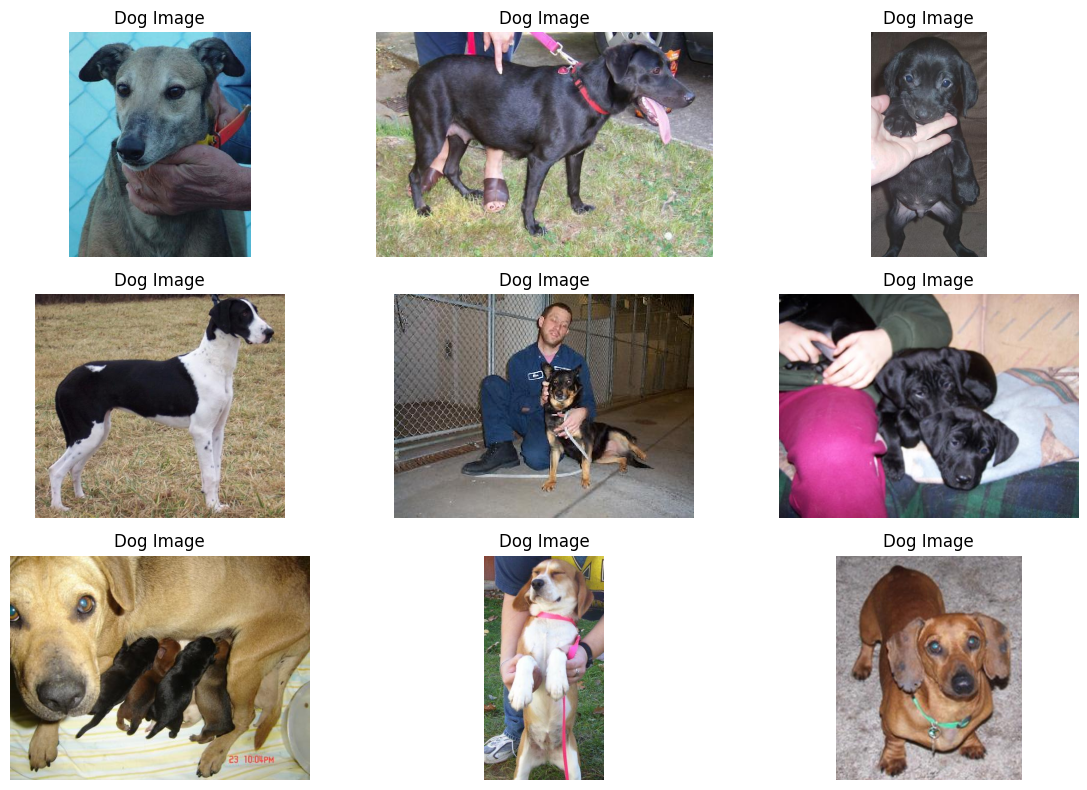

In [ ]:
# Importar y comprobar las 9 primeras imágenes de perros

# Ruta al directorio que contiene sus datos de imagen
data_dir = "./data/datasets/cats_and_dogs_extracted/PetImages"

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_subfolder = os.path.join(data_dir, "Dog")

# Obtener una lista de todos los nombres de archivos de imágenes de perros
dog_image_files = os.listdir(dog_subfolder)

# Cargar las nueve primeras imágenes de perros
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Ajuste target_size según sea necesario
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalice los valores de los píxeles a [0, 1].
    dog_images.append(img_array)

# Cree una única figura para mostrar las nueve imágenes
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

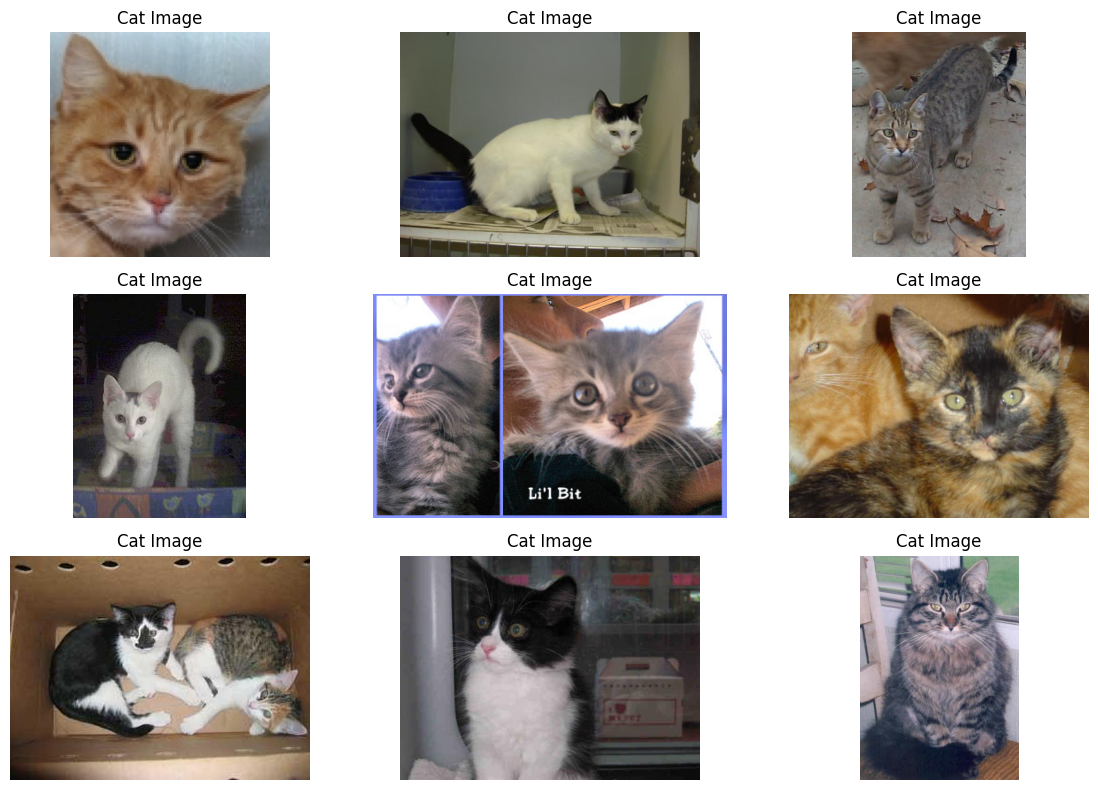

In [ ]:
# Importar y comprobar las 9 primeras imágenes de gatos

# Ruta al directorio que contiene sus datos de imagen
data_dir = "./data/datasets/cats_and_dogs_extracted/PetImages"

# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_subfolder = os.path.join(data_dir, "Cat")
rda en una lista
  random.shuffle(files)                           # Mezcla la lista de archivos de forma aleatoria
  
# Obtener una lista de todos los nombres de archivos de imagen Cat
cats_image_files = os.listdir(cats_subfolder)

# Cargar las nueve primeras imágenes de gato
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limitar a las imágenes de gato disponibles
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Crear una única figura para mostrar todas las imágenes cat
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Ajustar el diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

#### Crear los conjuntos de datos de imágenes


In [119]:
from keras.preprocessing.image import ImageDataGenerator

# Definir algunas reglas para DataGen
train_dir = "./data/datasets/cats_and_dogs_extracted/train"
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Generación de datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["dog", "cat"] 
)

# Generación de datos de prueba
test_data = datagentest.flow_from_directory(
    train_dir,
    target_size = image_size,
    classes = ["test"] 
)

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/home/vscode/.local/lib/python3.11/site-packages/keras/api/preprocessing/image/__init__.py)

#### Entrenar al modelo

In [ ]:
# Mover los datos a través de la red neuronal
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Mover los datos por las capas densas
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [ ]:
# Compilar el modelo con Adam 
from keras.optimizers import Adam

# Compilar el modelo antes del entrenamiento
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [ ]:
# Entrenar el modelo
model.fit(train_data, epochs = 1)

#### Guardar nuestro modelo para utilizarlo más tarde

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 100, validation_data = test_data, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])

#### Debido a las limitaciones de espacio de GitHub, el modelo no estará dentro de la carpeta models
##### Lo mismo con las fotos originales, no están en el repo

In [ ]:
# Comprobar la exactitud de los datos

# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

### Intenta predecir las imágenes

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")